<h1>Setup</h1>

In [1]:
# Functional imports
import os 
import numpy as np
import nibabel as nib
import pandas as pd

from data_prep_helpers import make_vol
from plotting_helpers import plot_lateral_only, plot_lateral_only_with_vmax, plot_surfaces, plot_surfaces_with_vmax

# Notebook specific imports
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%autosave 5


Bad key text.latex.preview in file /opt/miniconda3/envs/mybrainiak/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/miniconda3/envs/mybrainiak/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/miniconda3/envs/mybrainiak/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg i

Autosaving every 5 seconds


In [2]:
# Set data location
directory = os.path.join(os.path.expanduser('~'), 'Documents', 'Data')
print('Data location:', directory)

# Load masks
mask = nib.load(os.path.join(directory, 'adult_isc_mask.nii.gz'))
print('Mask:', np.shape(mask))

Data location: /Users/angira/Documents/Data
Mask: (79, 95, 68)


In [3]:
# Plot significant voxels
data = {'Age group': ['3-4 yrs', '5 yrs', '7 yrs', '8-12 yrs', 'adults'], 
       'Full scores': [133520, 132840, 132663, 134626, 133023],
       'Motion energy scores': [131590, 132840, 130079, 133184, 131731],
       'Social scores': [94251, 89864, 78108, 112286, 103616],
       'Faces scores': [618, 1135, 7229, 8924, 11665],
       'Interaction scores': [0, 2823, 3883, 12175, 10405],
      }
significance_df = pd.DataFrame(data)

print(significance_df)

  Age group  Full scores  Motion energy scores  Social scores  Faces scores  \
0   3-4 yrs       133520                131590          94251           618   
1     5 yrs       132840                132840          89864          1135   
2     7 yrs       132663                130079          78108          7229   
3  8-12 yrs       134626                133184         112286          8924   
4    adults       133023                131731         103616         11665   

   Interaction scores  
0                   0  
1                2823  
2                3883  
3               12175  
4               10405  


In [29]:
data = {'Age group': ['3-4 yrs', '5 yrs', '7 yrs', '8-12 yrs', 'adults'], 
       'Full scores': [(133520/136543), (132840/136543), (132663/136543), (134626/136543), (133023/136543)],
       'Motion energy scores': [(131590/136543), (132840/136543), (130079/136543), (133184/136543), (131731/136543)],
       'Social scores': [(94251/136543), (89864/136543), (78108/136543), (112286/136543), (103616/136543)],
       'Faces scores': [(618/136543), (1135/136543), (7229/136543), (8924/136543), (11665/136543)],
       'Interaction scores': [(0/136543), (2823/136543), (3883/136543), (12175/136543), (10405/136543)],
      }
significance_percent_df = pd.DataFrame(data)

print(significance_percent_df)

  Age group  Full scores  Motion energy scores  Social scores  Faces scores  \
0   3-4 yrs     0.977860              0.963726       0.690266      0.004526   
1     5 yrs     0.972880              0.972880       0.658137      0.008312   
2     7 yrs     0.971584              0.952660       0.572040      0.052943   
3  8-12 yrs     0.985960              0.975400       0.822349      0.065357   
4    adults     0.974221              0.964758       0.758853      0.085431   

   Interaction scores  
0            0.000000  
1            0.020675  
2            0.028438  
3            0.089166  
4            0.076203  


<h1>Social figure</h1>

In [4]:
# Load unthresholded results
social_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'unthresholded', '3-4-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs', 'unthresholded', '5-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs', 'unthresholded', '7-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs', 'unthresholded', '8-12-yrs_social_only_scores_adult_isc_mask.npy')), axis=0)

social_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'unthresholded', 'adults_social_only_scores_adult_isc_mask.npy')), axis=0)

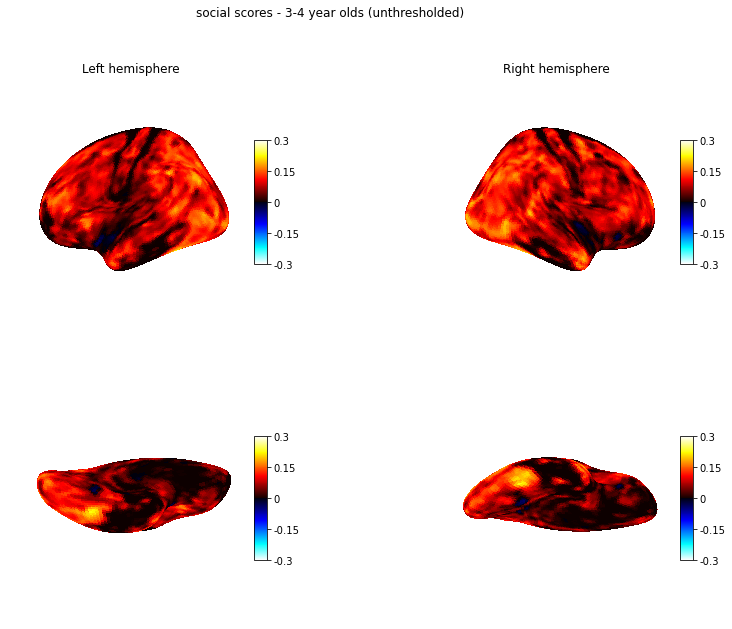

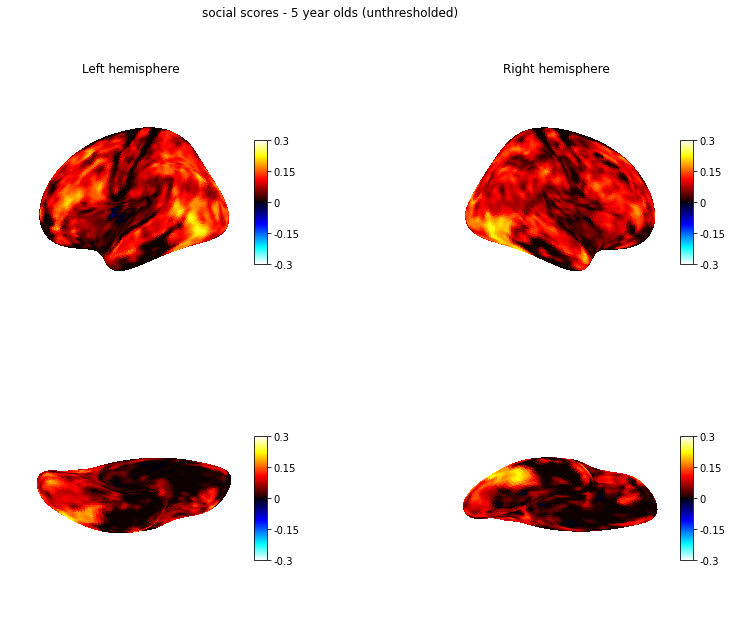

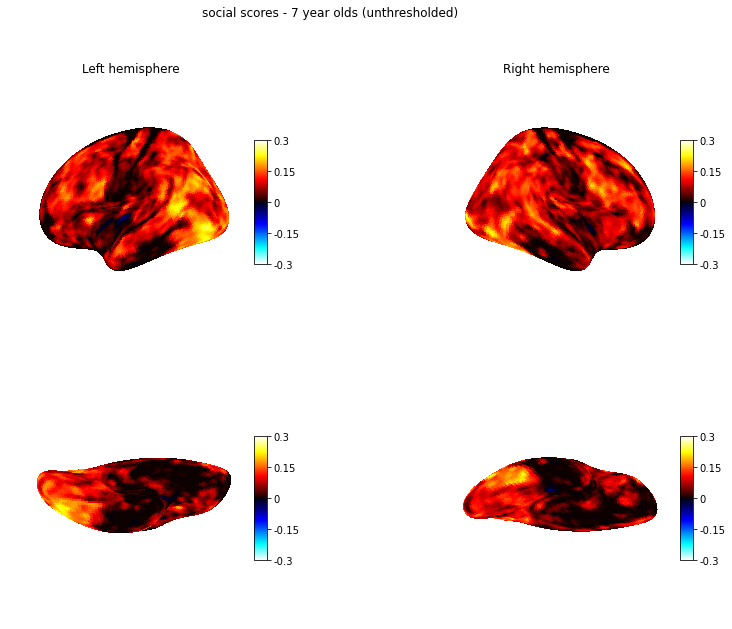

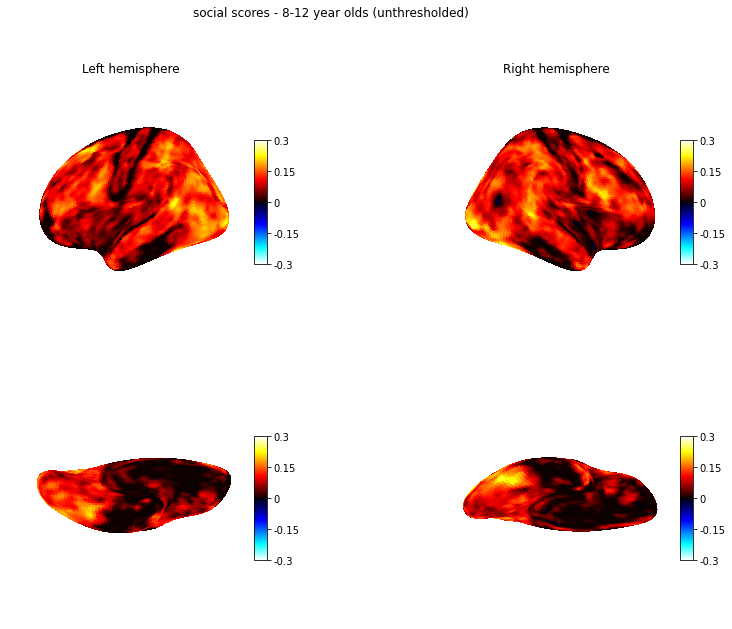

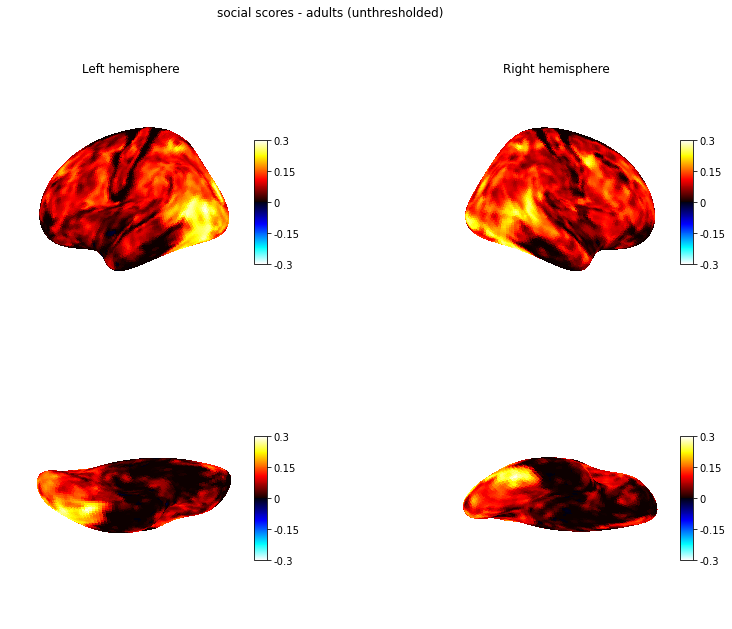

In [6]:
# 3-4 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_34yrs_unthresholded, mask), 
                            title='social scores - 3-4 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.3)

# 5 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_5yrs_unthresholded, mask), 
                            title='social scores - 5 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.3)

# 7 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_7yrs_unthresholded, mask), 
                            title='social scores - 7 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.3)


# 8-12 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_812yrs_unthresholded, mask), 
                            title='social scores - 8-12 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.3)


# Adults

plot_surfaces_with_vmax(vol=make_vol(social_scores_adults_unthresholded, mask), 
                            title='social scores - adults (unthresholded)', 
                            vis_threshold=0, vmax=0.3)


In [25]:
# Load thresholded scores
social_scores_34yrs_thresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'thresholded', '3-4-yrs_social_only_scores_adult_isc_mask_thresholded05.npy'))

social_scores_5yrs_thresholded = np.load(os.path.join(
    directory, '5-yrs', 'thresholded', '5-yrs_social_only_scores_adult_isc_mask_thresholded05.npy'))

social_scores_7yrs_thresholded = np.load(os.path.join(
    directory, '7-yrs', 'thresholded', '7-yrs_social_only_scores_adult_isc_mask_thresholded05.npy'))

social_scores_812yrs_thresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'thresholded', '8-12-yrs_social_only_scores_adult_isc_mask_thresholded05.npy'))

social_scores_adults_thresholded = np.load(os.path.join(
    directory, 'adults', 'thresholded', 'adults_social_only_scores_adult_isc_mask_thresholded05.npy'))

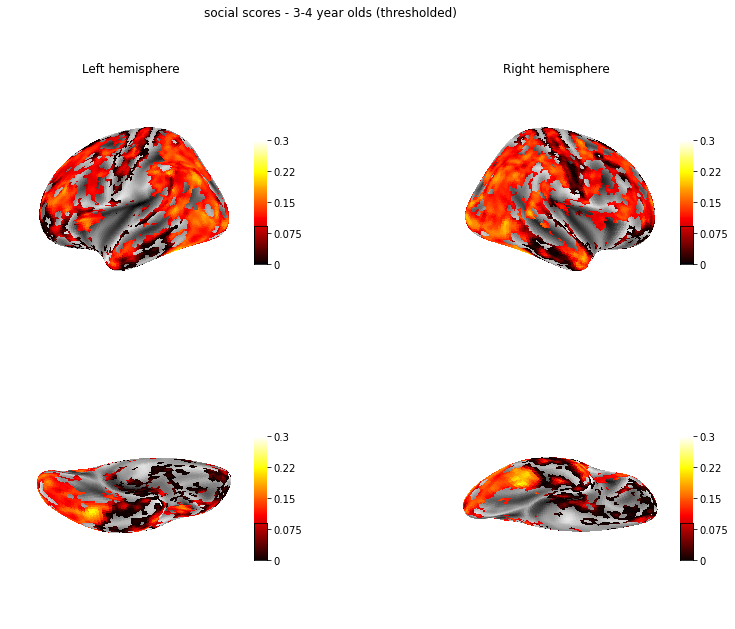

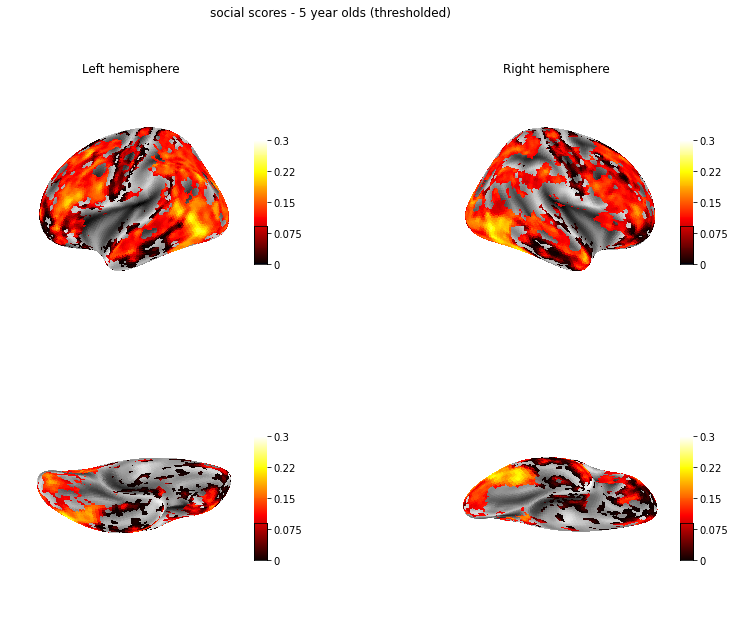

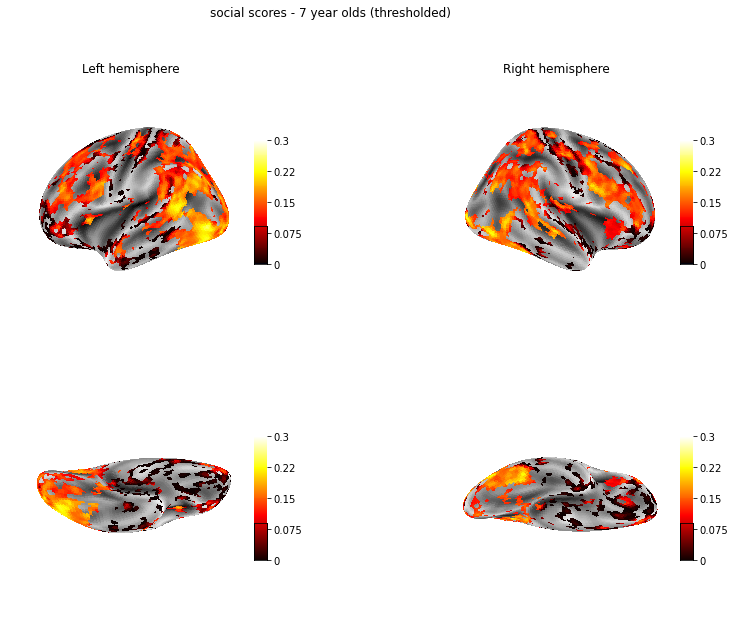

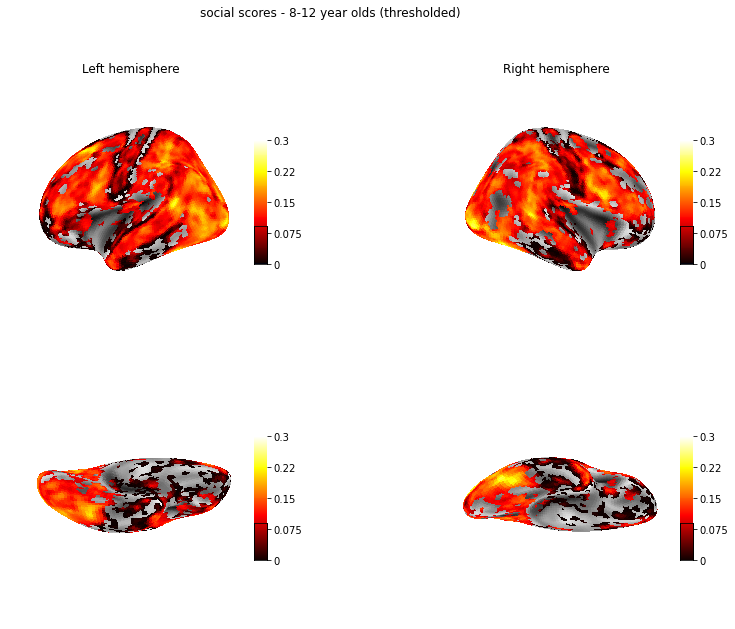

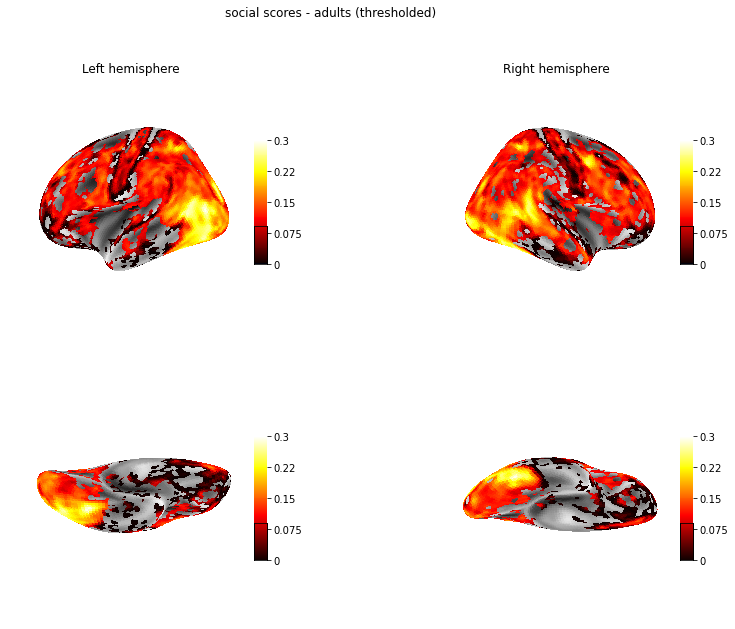

In [26]:
# 3-4 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_34yrs_thresholded, mask), 
                            title='social scores - 3-4 year olds (thresholded)', 
                            vis_threshold=0.0001, vmax=0.3)

# 5 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_5yrs_thresholded, mask), 
                            title='social scores - 5 year olds (thresholded)', 
                            vis_threshold=0.0001, vmax=0.3)

# 7 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_7yrs_thresholded, mask), 
                            title='social scores - 7 year olds (thresholded)', 
                            vis_threshold=0.0001, vmax=0.3)

# 8-12 year olds

plot_surfaces_with_vmax(vol=make_vol(social_scores_812yrs_thresholded, mask), 
                            title='social scores - 8-12 year olds (thresholded)', 
                            vis_threshold=0.0001, vmax=0.3)
# adults

plot_surfaces_with_vmax(vol=make_vol(social_scores_adults_thresholded, mask), 
                            title='social scores - adults (thresholded)', 
                            vis_threshold=0.0001, vmax=0.3)

<h1>Full model figures</h1>

In [4]:
# Load unthresholded results
full_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'unthresholded', '3-4-yrs_full_scores_adult_isc_mask.npy')), axis=0)

full_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs', 'unthresholded', '5-yrs_full_scores_adult_isc_mask.npy')), axis=0)

full_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs', 'unthresholded', '7-yrs_full_scores_adult_isc_mask.npy')), axis=0)

full_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs', 'unthresholded', '8-12-yrs_full_scores_adult_isc_mask.npy')), axis=0)

full_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'unthresholded', 'adults_full_scores_adult_isc_mask.npy')), axis=0)

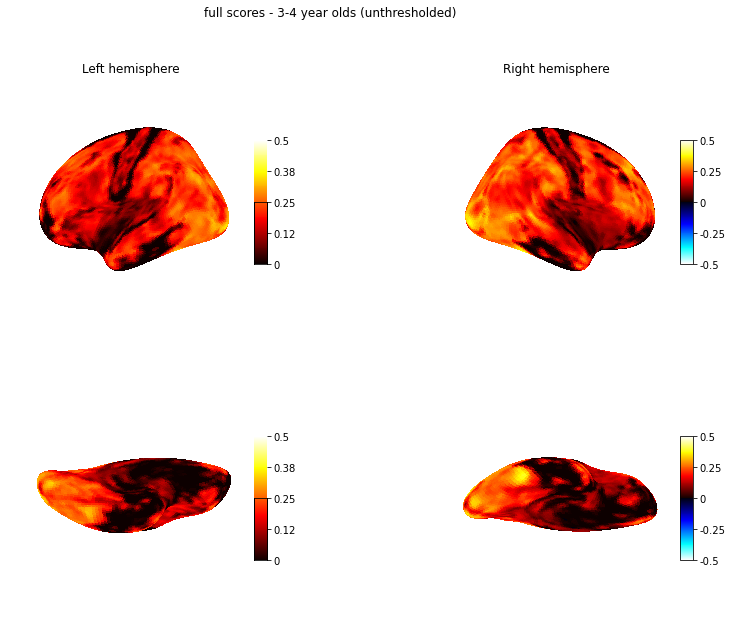

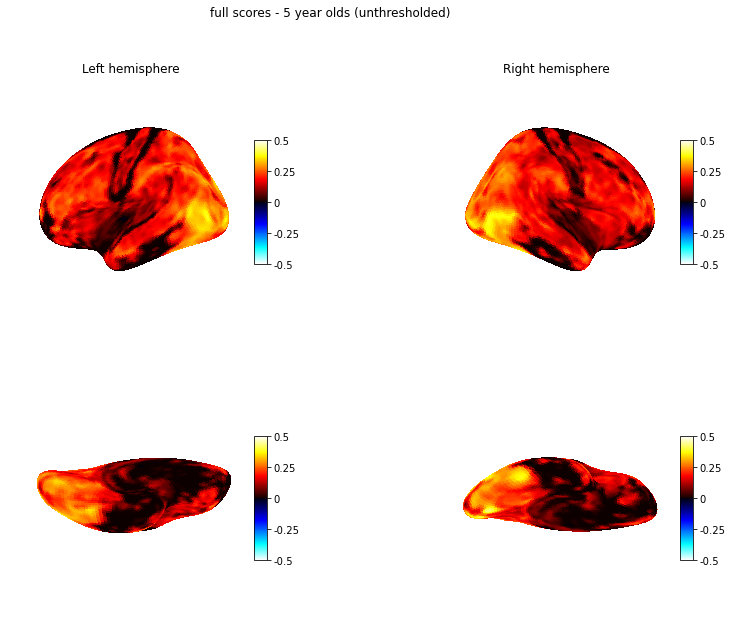

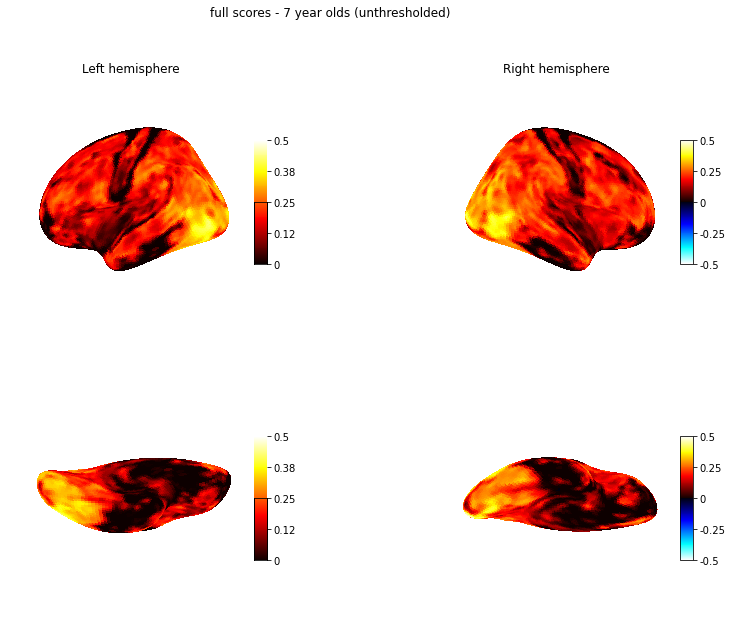

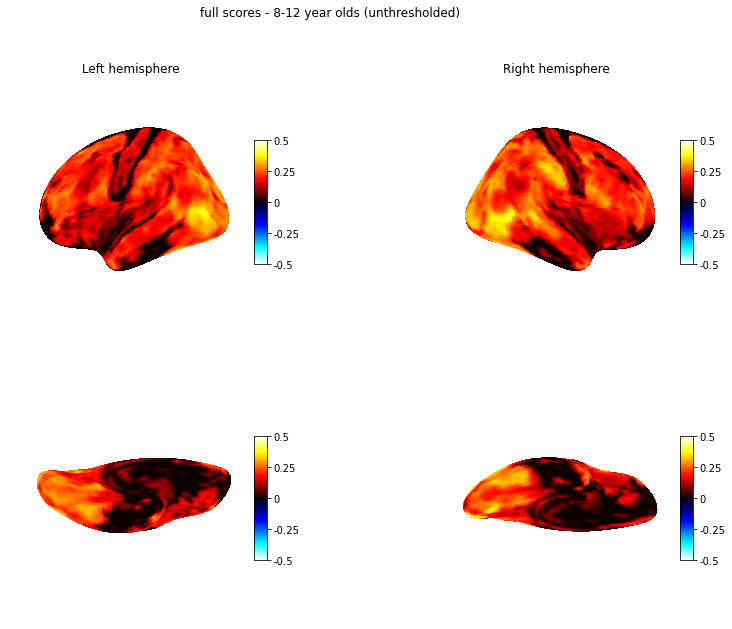

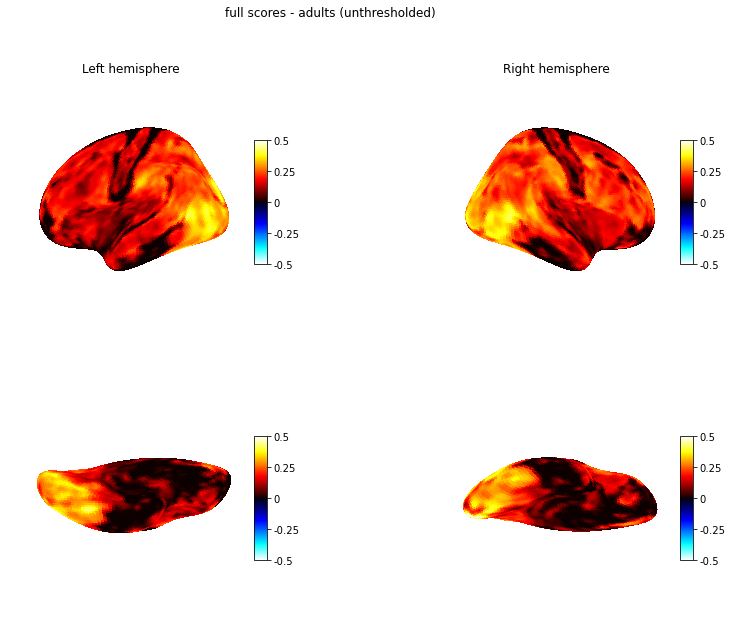

In [7]:
# 3-4 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_34yrs_unthresholded, mask), 
                            title='full scores - 3-4 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.5)

# 5 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_5yrs_unthresholded, mask), 
                            title='full scores - 5 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.5)

# 7 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_7yrs_unthresholded, mask), 
                            title='full scores - 7 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.5)


# 8-12 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_812yrs_unthresholded, mask), 
                            title='full scores - 8-12 year olds (unthresholded)', 
                            vis_threshold=0, vmax=0.5)


# Adults

plot_surfaces_with_vmax(vol=make_vol(full_scores_adults_unthresholded, mask), 
                            title='full scores - adults (unthresholded)', 
                            vis_threshold=0, vmax=0.5)

In [10]:
# Load thresholded scores
full_scores_34yrs_thresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'thresholded', '3-4-yrs_full_scores_adult_isc_mask_thresholded05.npy'))

full_scores_5yrs_thresholded = np.load(os.path.join(
    directory, '5-yrs', 'thresholded', '5-yrs_full_scores_adult_isc_mask_thresholded05.npy'))

full_scores_7yrs_thresholded = np.load(os.path.join(
    directory, '7-yrs', 'thresholded', '7-yrs_full_scores_adult_isc_mask_thresholded05.npy'))

full_scores_812yrs_thresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'thresholded', '8-12-yrs_full_scores_adult_isc_mask_thresholded05.npy'))

full_scores_adults_thresholded = np.load(os.path.join(
    directory, 'adults', 'thresholded', 'adults_full_scores_adult_isc_mask_thresholded05.npy'))

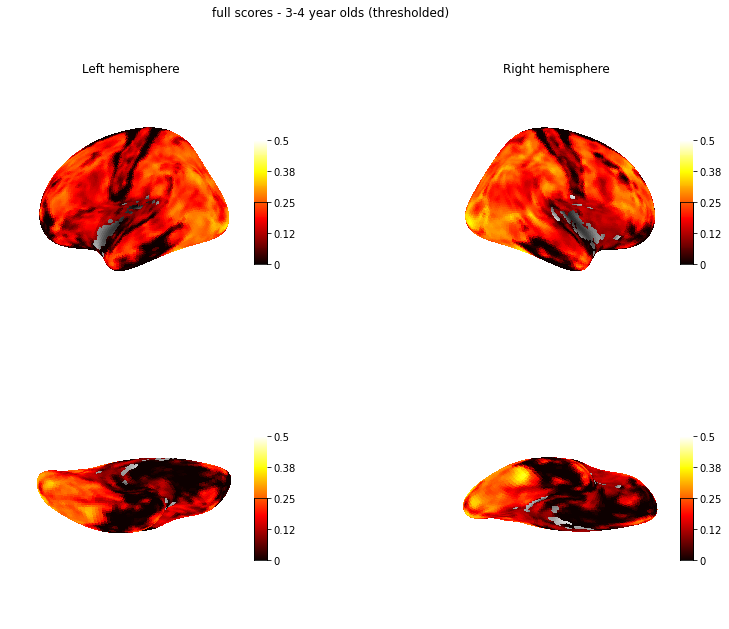

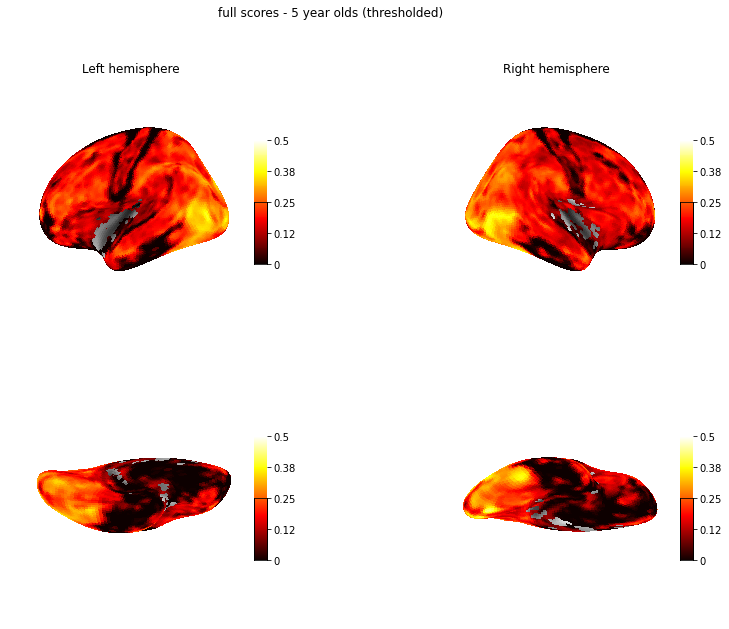

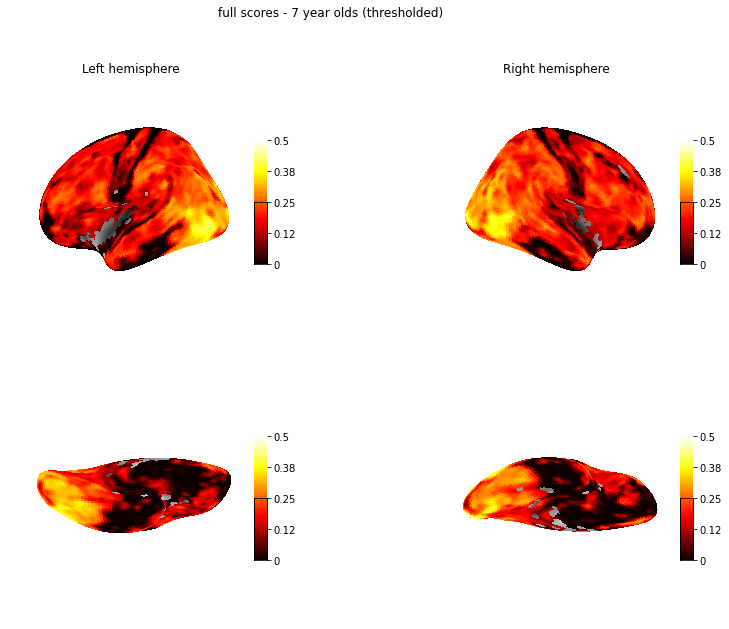

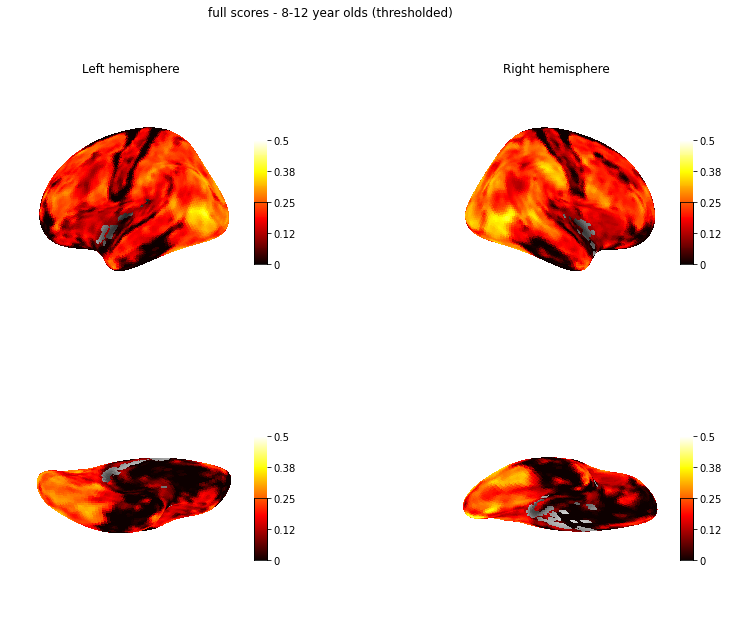

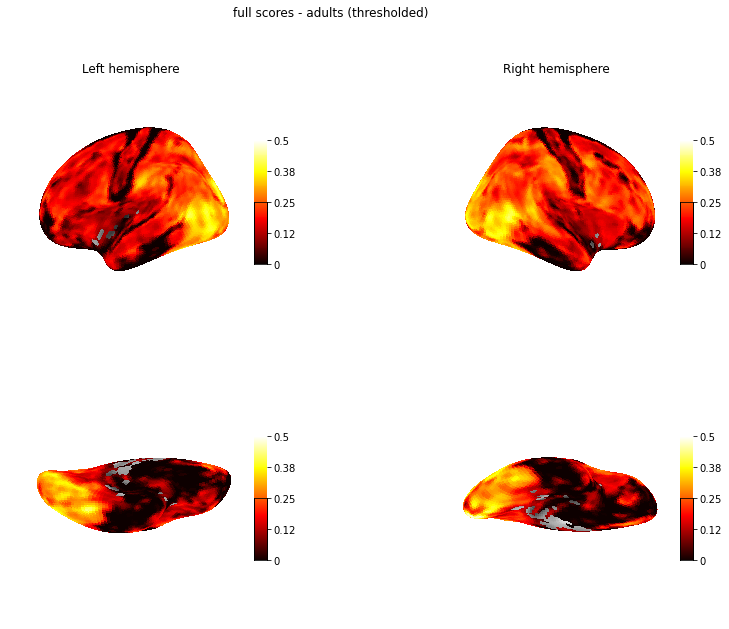

In [11]:
# 3-4 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_34yrs_thresholded, mask), 
                            title='full scores - 3-4 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.5)

# 5 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_5yrs_thresholded, mask), 
                            title='full scores - 5 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.5)

# 7 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_7yrs_thresholded, mask), 
                            title='full scores - 7 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.5)


# 8-12 year olds

plot_surfaces_with_vmax(vol=make_vol(full_scores_812yrs_thresholded, mask), 
                            title='full scores - 8-12 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.5)


# Adults

plot_surfaces_with_vmax(vol=make_vol(full_scores_adults_thresholded, mask), 
                            title='full scores - adults (thresholded)', 
                            vis_threshold=0, vmax=0.5)


<h1>Faces</h1>

In [4]:
# Load unthresholded results
faces_scores_34yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '3-4-yrs', 'unthresholded', '3-4-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

faces_scores_5yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '5-yrs', 'unthresholded', '5-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

faces_scores_7yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '7-yrs', 'unthresholded', '7-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

faces_scores_812yrs_unthresholded = np.mean(np.load(os.path.join(
    directory, '8-12-yrs', 'unthresholded', '8-12-yrs_faces_only_scores_adult_isc_mask.npy')), axis=0)

faces_scores_adults_unthresholded = np.mean(np.load(os.path.join(
    directory, 'adults', 'unthresholded', 'adults_faces_only_scores_adult_isc_mask.npy')), axis=0)

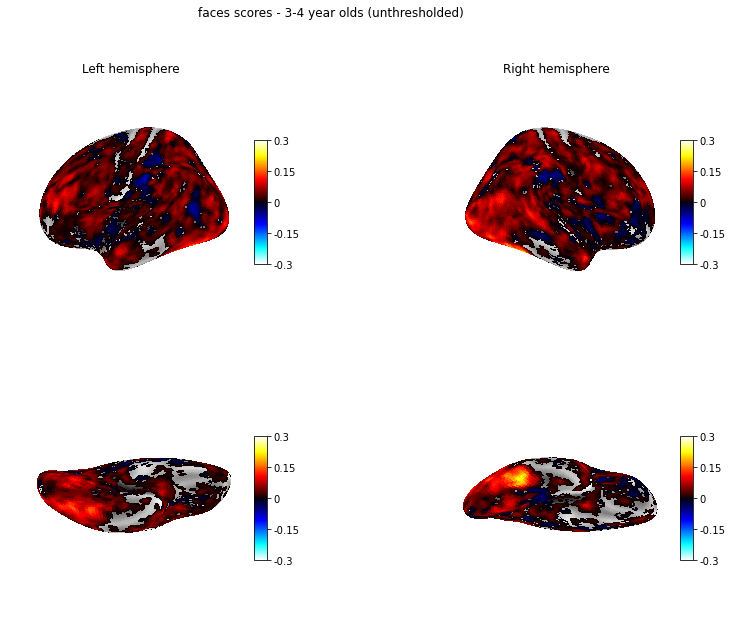

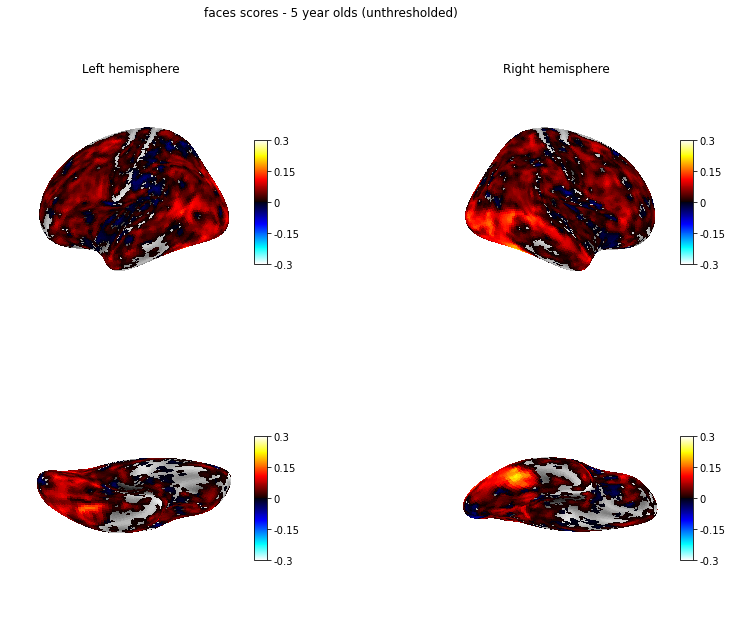

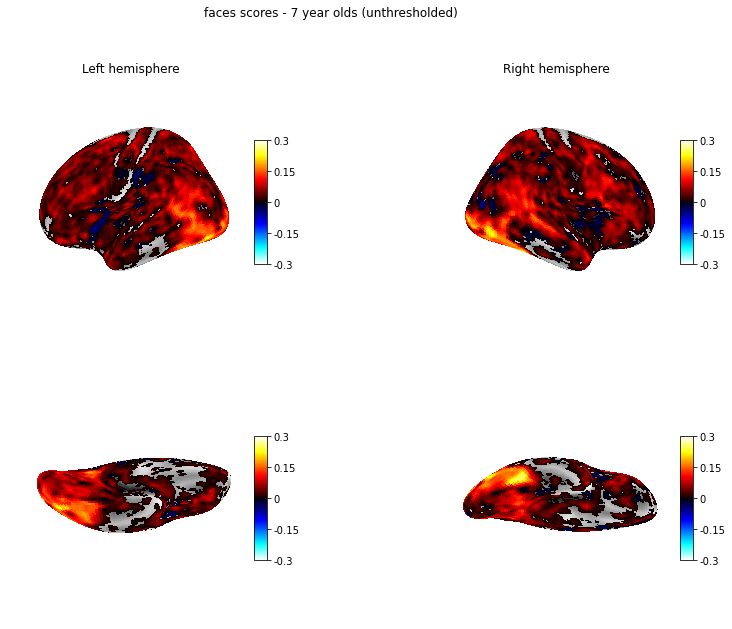

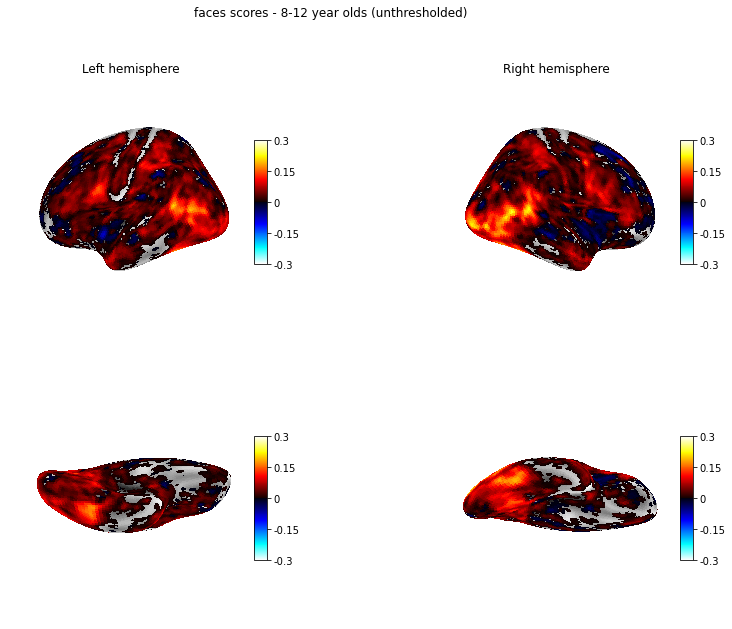

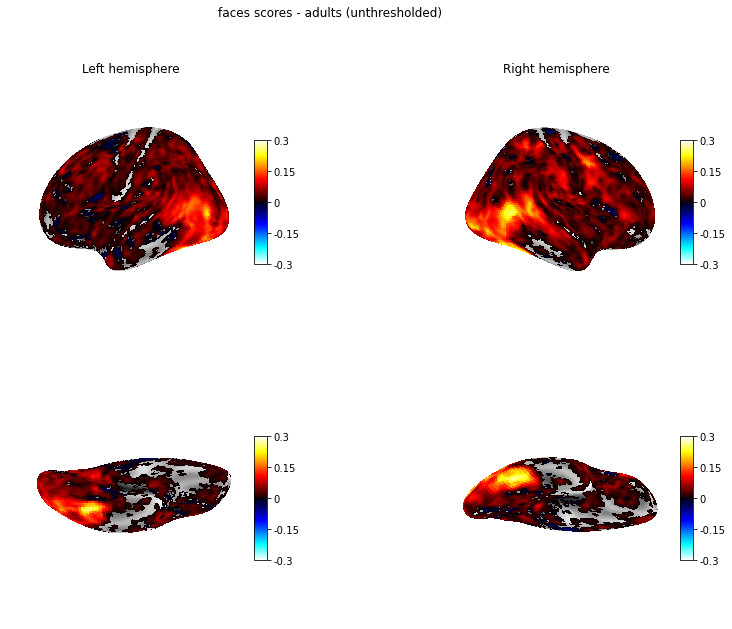

In [21]:
# 3-4 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_34yrs_unthresholded, mask), 
                            title='faces scores - 3-4 year olds (unthresholded)', 
                            vis_threshold=0.001, vmax=0.3)

# 5 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_5yrs_unthresholded, mask), 
                            title='faces scores - 5 year olds (unthresholded)', 
                            vis_threshold=0.001, vmax=0.3)

# 7 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_7yrs_unthresholded, mask), 
                            title='faces scores - 7 year olds (unthresholded)', 
                            vis_threshold=0.001, vmax=0.3)

# 8-12 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_812yrs_unthresholded, mask), 
                            title='faces scores - 8-12 year olds (unthresholded)', 
                            vis_threshold=0.001, vmax=0.3)
# adults

plot_surfaces_with_vmax(vol=make_vol(faces_scores_adults_unthresholded, mask), 
                            title='faces scores - adults (unthresholded)', 
                            vis_threshold=0.001, vmax=0.3)

In [5]:
# Load thresholded scores
faces_scores_34yrs_thresholded = np.load(os.path.join(
    directory, '3-4-yrs', 'thresholded', '3-4-yrs_faces_only_scores_adult_isc_mask_thresholded05.npy'))

faces_scores_5yrs_thresholded = np.load(os.path.join(
    directory, '5-yrs', 'thresholded', '5-yrs_faces_only_scores_adult_isc_mask_thresholded05.npy'))

faces_scores_7yrs_thresholded = np.load(os.path.join(
    directory, '7-yrs', 'thresholded', '7-yrs_faces_only_scores_adult_isc_mask_thresholded05.npy'))

faces_scores_812yrs_thresholded = np.load(os.path.join(
    directory, '8-12-yrs', 'thresholded', '8-12-yrs_faces_only_scores_adult_isc_mask_thresholded05.npy'))

faces_scores_adults_thresholded = np.load(os.path.join(
    directory, 'adults', 'thresholded', 'adults_faces_only_scores_adult_isc_mask_thresholded05.npy'))

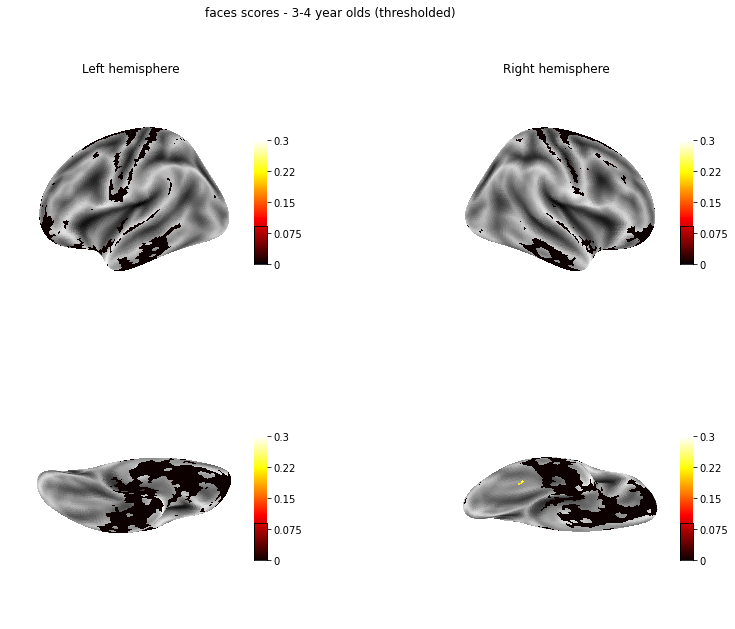

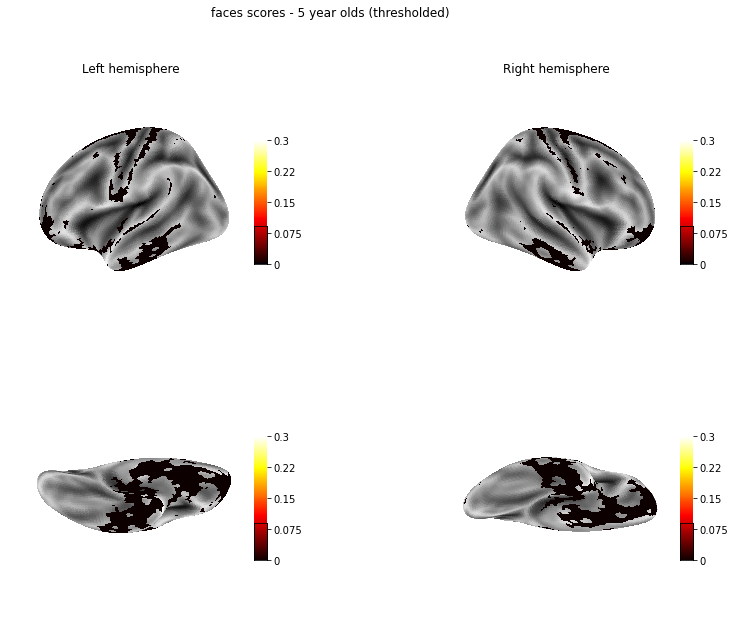

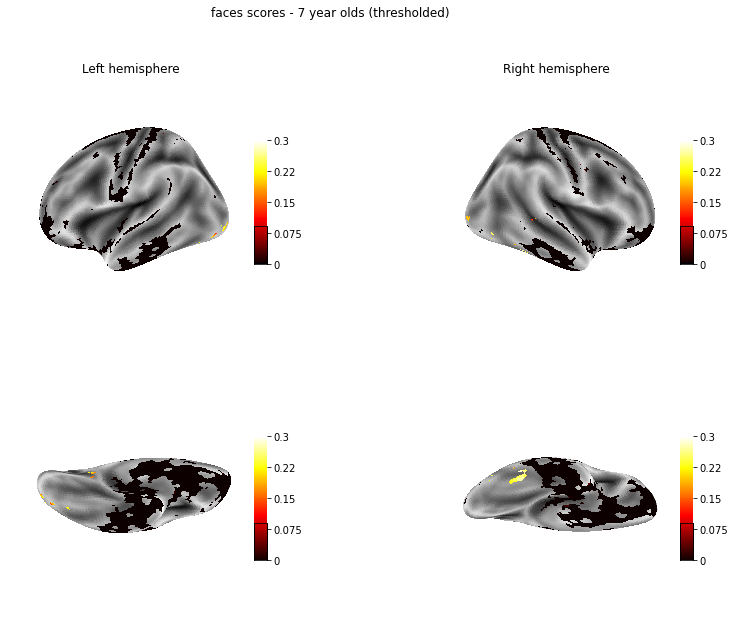

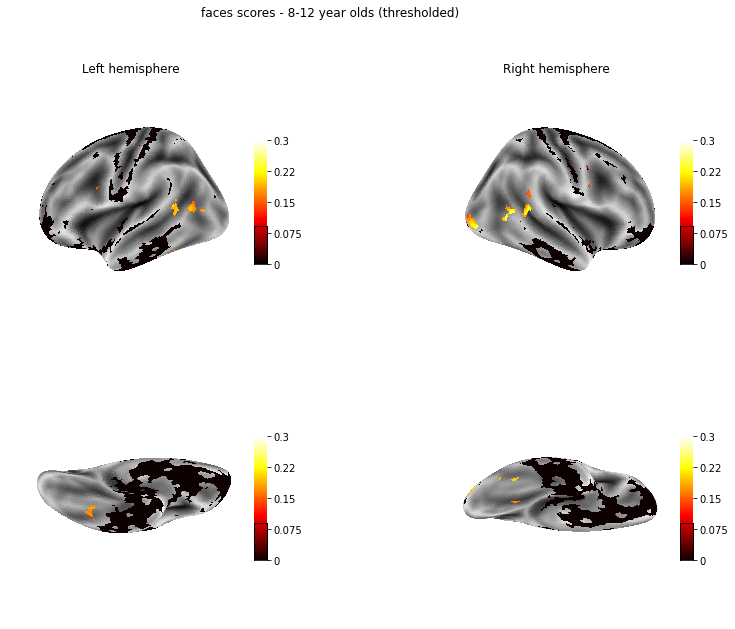

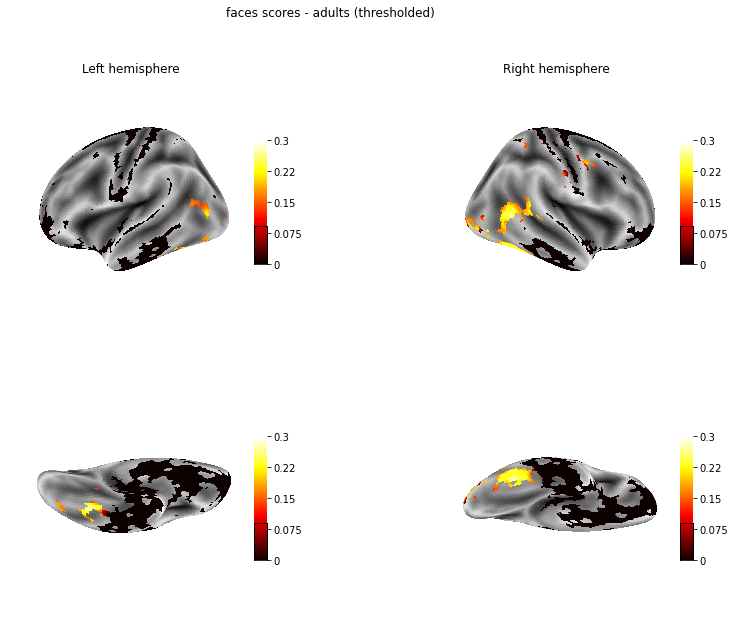

In [10]:
# 3-4 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_34yrs_thresholded, mask), 
                            title='faces scores - 3-4 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.3)

# 5 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_5yrs_thresholded, mask), 
                            title='faces scores - 5 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.3)

# 7 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_7yrs_thresholded, mask), 
                            title='faces scores - 7 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.3)

# 8-12 year olds

plot_surfaces_with_vmax(vol=make_vol(faces_scores_812yrs_thresholded, mask), 
                            title='faces scores - 8-12 year olds (thresholded)', 
                            vis_threshold=0, vmax=0.3)
# adults

plot_surfaces_with_vmax(vol=make_vol(faces_scores_adults_thresholded, mask), 
                            title='faces scores - adults (thresholded)', 
                            vis_threshold=0, vmax=0.3)

In [3]:
from nilearn import plotting, datasets, surface
from scipy import ndimage

fsaverage = datasets.fetch_surf_fsaverage()

faces_scores_adults_thresholded = np.load(os.path.join(
    directory, 'adults', 'thresholded', 'adults_faces_only_scores_adult_isc_mask_thresholded05.npy'))

data_vol=make_vol(faces_scores_adults_thresholded, mask)
right_surf = surface.vol_to_surf(data_vol, fsaverage.pial_right)
left_surf = surface.vol_to_surf(data_vol, fsaverage.pial_left)



In [25]:
faces_roi_nonzero = faces_scores_adults_thresholded > 0.2
faces_roi_nonzero_vol = make_vol(faces_roi_nonzero, mask)
faces_roi_right_surface = surface.vol_to_surf(faces_roi_nonzero_vol, fsaverage.pial_right)
faces_roi_right_closed = ndimage.binary_closing(faces_roi_right_surface, iterations=2)

faces_roi_left_surface = surface.vol_to_surf(faces_roi_nonzero_vol, fsaverage.pial_left)
faces_roi_left_closed = ndimage.binary_closing(faces_roi_left_surface, iterations=2)


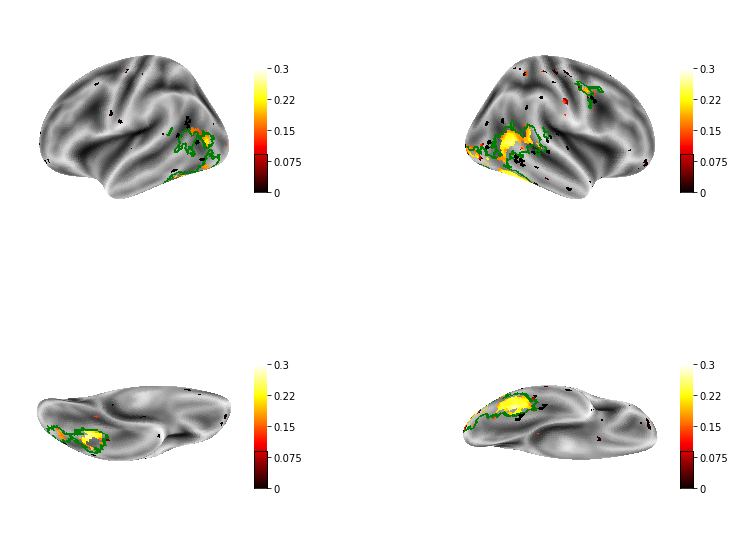

In [26]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')

ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')

# Left 
plotting.plot_surf_stat_map(fsaverage.infl_left, left_surf, 
                            hemi='left', view='lateral', bg_map=fsaverage.sulc_left,
                            colorbar=True, threshold=0.001, vmax=0.3, 
                            axes=ax1)

plotting.plot_surf_contours(fsaverage.infl_left, faces_roi_left_closed, colors=['k', 'g'], axes=ax1)

plotting.plot_surf_stat_map(fsaverage.infl_left, left_surf, 
                            hemi='left', view='ventral', bg_map=fsaverage.sulc_left,
                            colorbar=True, threshold=0.001, vmax=0.3,
                            axes=ax3)

plotting.plot_surf_contours(fsaverage.infl_left, faces_roi_left_closed, colors=['k', 'g'], axes=ax3)



# Right
plotting.plot_surf_stat_map(fsaverage.infl_right, right_surf, 
                            hemi='right', view='lateral', bg_map=fsaverage.sulc_right,
                            colorbar=True, threshold=0.001, vmax=0.3, 
                            axes=ax2)

plotting.plot_surf_contours(fsaverage.infl_right, faces_roi_right_closed, colors=['k', 'g'], axes=ax2)

plotting.plot_surf_stat_map(fsaverage.infl_right, right_surf, 
                            hemi='right', view='ventral', bg_map=fsaverage.sulc_right,
                            colorbar=True, threshold=0.001, vmax=0.3,
                            axes=ax4)

plotting.plot_surf_contours(fsaverage.infl_right, faces_roi_right_closed, colors=['k', 'g'], axes=ax4)

plotting.show()